<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_002_examples/_001_first_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# !unzip '/content/drive/My Drive/Colab Notebooks/data/programmers_v2/train_job.zip' -d '/content/drive/My Drive/Colab Notebooks/data/programmers_v2/'

In [3]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [4]:
data_dir_path = '/content/drive/My Drive/Colab Notebooks/data/programmers_v2/'

In [5]:
import pandas as pd

def cp(s):
  return "{}{}".format(data_dir_path, s)

tags_df = pd.read_csv(cp('tags.csv'))
train_df = pd.read_csv(cp('train.csv'))
user_tag_df = pd.read_csv(cp('user_tags.csv'))
job_companies_df = pd.read_csv(cp('job_companies.csv'))
job_tag_df = pd.read_csv(cp('job_tags.csv'))

In [6]:
tags_df.sample(5)

,tagID,keyword
121,a113c1ecd3cace2237256f4c712f61b5,gulp
288,1113d7a76ffceca1bb350bfe145467c6,AWS Amplify
413,26751be1181460baf78db8d5eb7aad39,Google Cloud Text-to-Speech
675,3d2d8ccb37df977cb6d9da15b76c3f3a,konlpy
372,b2531e7bb29bf22e1daae486fae3417a,Netlify


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


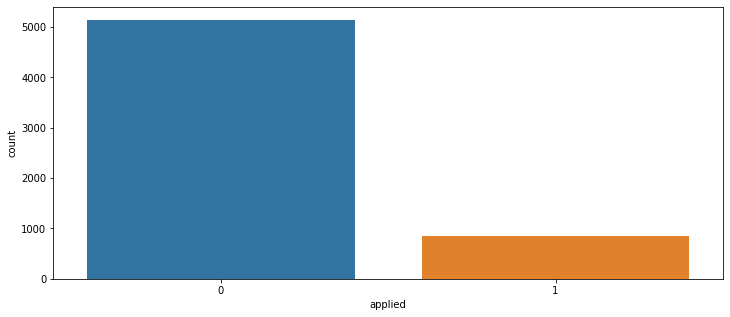

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.countplot(train_df['applied'])

In [8]:
a = job_tag_df.groupby('jobID')
a.jobID.value_counts()

jobID                             jobID                           
00ac8ed3b4327bdd4ebbebcb2ba10a00  00ac8ed3b4327bdd4ebbebcb2ba10a00     7
00e26af6ac3b1c1c49d7c3d79c60d000  00e26af6ac3b1c1c49d7c3d79c60d000    12
00ec53c4682d36f5c4359f4ae7bd7ba1  00ec53c4682d36f5c4359f4ae7bd7ba1     4
013a006f03dbc5392effeb8f18fda755  013a006f03dbc5392effeb8f18fda755     3
0188e8b8b014829e2fa0f430f0a95961  0188e8b8b014829e2fa0f430f0a95961     3
                                                                      ..
fed33392d3a48aa149a87a38b875ba4a  fed33392d3a48aa149a87a38b875ba4a     5
ff4d5fbbafdf976cfdc032e3bde78de5  ff4d5fbbafdf976cfdc032e3bde78de5     4
ffd52f3c7e12435a724a8f30fddadd9c  ffd52f3c7e12435a724a8f30fddadd9c     4
ffeabd223de0d4eacb9a3e6e53e5448d  ffeabd223de0d4eacb9a3e6e53e5448d     3
ffeed84c7cb1ae7bf4ec4bd78275bb98  ffeed84c7cb1ae7bf4ec4bd78275bb98     2
Name: jobID, Length: 733, dtype: int64

In [9]:
tags_df[tags_df['tagID'] == '8e2cfdc275761edc592f73a076197c33']['keyword'].values[0]

'Webpack'

In [10]:
def grouping_tags(df: pd.DataFrame, id: str) -> {}:
    result = []
    for u, t in df.groupby(id):
      temp = {}
      temp[id] = u
      temp['{}_tags'.format(id)] = " ".join(set(df[df[id] == u]['tagID'].apply(lambda x: tags_df[tags_df['tagID'] == x]['keyword'].values[0])))
      result.append(temp)

    return pd.DataFrame(result)

In [11]:
job_match_df = grouping_tags(job_tag_df, 'jobID')
job_match_df.head(2)

,jobID,jobID_tags
0,00ac8ed3b4327bdd4ebbebcb2ba10a00,Git RxJava Android Java Firebase Kotlin REST API
1,00e26af6ac3b1c1c49d7c3d79c60d000,Angular AngularJS Java Android MySQL Node.js P...


In [12]:
user_match_df = grouping_tags(user_tag_df, 'userID')
user_match_df.sample(2)

,userID,userID_tags
6,078dd365ebc98784af7f8df76a98f53a,Moment.js Java MySQL Spring Vue.js Spring Secu...
80,6ff9a855e440fa3a54807a91fdf82da4,Apache Tomcat AWS Lightsail BitBucket MySQL Ja...


# train 데이터에 job과 user tag 삽입

In [13]:
merge_user = pd.merge(train_df, user_match_df, how='left')
complete_merge = pd.merge(merge_user, job_match_df, how='left')

# 정규화 필요

In [14]:
complete_merge[complete_merge['applied'] == 1]

,userID,jobID,applied,userID_tags,jobID_tags
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,Ubuntu Android Facebook API Node.js AWS EC2 Ra...,Android iOS Swift
23,b052e2e0c0ad1b2d5036bd56e27d061c,4a213d37242bdcad8e7300e202e7caa4,1,Apache Tomcat HTML5 MySQL Hibernate Spring Dat...,Git MongoDB MySQL Redis Java Node.js
24,a35af76a1c0bb174a3cfc66592804848,e820a45f1dfc7b95282d10b6087e11c0,1,Laravel Responsive Web Java Android Vue.js Nod...,AngularJS CSS ReactJS Vue.js HTML JavaScript
29,cb08b2c94dbb772324444bb4ed7cc1a4,9b70e8fe62e40c570a322f1b0b659098,1,Git AngularJS Java Spring SQL JavaScript jQuer...,JPA(Java Persistent API) Java ReactJS OpenStac...
35,688da39dcb1131d0d91b348653850d08,b534ba68236ba543ae44b22bd110a1d6,1,CSS ReactJS MySQL Linux Node.js HTML JavaScrip...,Git PostgreSQL ReactJS Linux Node.js JavaScrip...
...,...,...,...,...,...
5976,e3979074cac4d9393ebbd4c2a534a851,58d4d1e7b1e97b258c9ed0b37e02d087,1,CSS MySQL GCP(Google Cloud Platform) Node.js M...,AWS Lambda Node.js AWS RDS AWS DynamoDB JavaSc...
5981,6da6479250104018131de61655f1f385,851ddf5058cf22df63d3344ad89919cf,1,Django BeautifulSoup HTML5 Ubuntu Tensorflow B...,Aurora DB Ruby MySQL GitHub Vue.js Sass(SCSS) ...
5983,6bd22a86b1f7a3a11de928d301f86d67,758874998f5bd0c393da094e1967a72b,1,Java Android Node.js JavaScript Kotlin,Java Kotlin
5985,2eeb9064f7f5b2569912cbb772a96438,24b16fede9a67c9251d3e7c7161c83ac,1,Django SQLite Python JavaScript C,Ruby Database PostgreSQL Redis Ruby on Rails M...


In [15]:
complete_merge['job_tags_split'] = complete_merge['jobID_tags'].apply(lambda x: x.split(","))
complete_merge['user_tags_split'] = complete_merge['userID_tags'].apply(lambda x: x.split(","))

In [16]:
complete_merge

,userID,jobID,applied,userID_tags,jobID_tags,job_tags_split,user_tags_split
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,MongoDB Machine Learning Java ReactJS Android ...,Ruby on Rails Ruby,[Ruby on Rails Ruby],[MongoDB Machine Learning Java ReactJS Android...
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,Apache Tomcat HTML5 Google API MySQL Azure CSS...,MySQL AWS DynamoDB Python,[MySQL AWS DynamoDB Python],[Apache Tomcat HTML5 Google API MySQL Azure CS...
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,Ubuntu Android Facebook API Node.js AWS EC2 Ra...,Android iOS Swift,[Android iOS Swift],[Ubuntu Android Facebook API Node.js AWS EC2 R...
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,GraphQL CSS Android ReactJS Flask Redis Tensor...,ReactJS Vue.js JavaScript React Native TypeScript,[ReactJS Vue.js JavaScript React Native TypeSc...,[GraphQL CSS Android ReactJS Flask Redis Tenso...
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,JPA(Java Persistent API) Toss API KakaoPay API...,ReactJS Webpack JavaScript Python,[ReactJS Webpack JavaScript Python],[JPA(Java Persistent API) Toss API KakaoPay AP...
...,...,...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,GraphQL MySQL Node.js MongoDB Vuetify.js Sprin...,Java JavaScript,[Java JavaScript],[GraphQL MySQL Node.js MongoDB Vuetify.js Spri...
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,Google API Node.js Google Maps API Sequelize.j...,Git ReactJS Android Objective-C React Native J...,[Git ReactJS Android Objective-C React Native ...,[Google API Node.js Google Maps API Sequelize....
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,MongoDB CSS HTML5 Java MySQL Java Servlet Spri...,Go CI/CD MySQL Java Linux Apache Kafka Elastic...,[Go CI/CD MySQL Java Linux Apache Kafka Elasti...,[MongoDB CSS HTML5 Java MySQL Java Servlet Spr...
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,GraphQL Git ReactJS styled-components Sass(SCS...,ReactJS Webpack JavaScript Node.js,[ReactJS Webpack JavaScript Node.js],[GraphQL Git ReactJS styled-components Sass(SC...


In [17]:
complete_merge['userID_tags'].sample().apply(lambda x: x.split(",")).tolist()

[['MyBatis MySQL Node.js Firebase MariaDB Ajax Axios Spring Google Analytics Next.js Java Persistence API ReactJS Elasticsearch Vuex jQuery Amazon Web Services(AWS) Java Bootstrap Vue.js Python JavaScript JSP Spring Boot Redux.js']]

In [18]:
from sklearn.metrics.pairwise import euclidean_distances

def l1_normalize(v):
    return v / np.sum(v)

# euclidean_distances(tfidf_metric[:, :, 2], tfidf_metric[:, :, 1])

## 첫 번째 시도



In [19]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(complete_merge['userID_tags'])
tag_sequences = tokenizer.texts_to_sequences(complete_merge['userID_tags'])
tag_vocab = tokenizer.word_index


tag_vocab
# tokenizer.texts_to_sequences()

In [21]:
complete_merge

,userID,jobID,applied,userID_tags,jobID_tags,job_tags_split,user_tags_split
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,MongoDB Machine Learning Java ReactJS Android ...,Ruby on Rails Ruby,[Ruby on Rails Ruby],[MongoDB Machine Learning Java ReactJS Android...
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,Apache Tomcat HTML5 Google API MySQL Azure CSS...,MySQL AWS DynamoDB Python,[MySQL AWS DynamoDB Python],[Apache Tomcat HTML5 Google API MySQL Azure CS...
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,Ubuntu Android Facebook API Node.js AWS EC2 Ra...,Android iOS Swift,[Android iOS Swift],[Ubuntu Android Facebook API Node.js AWS EC2 R...
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,GraphQL CSS Android ReactJS Flask Redis Tensor...,ReactJS Vue.js JavaScript React Native TypeScript,[ReactJS Vue.js JavaScript React Native TypeSc...,[GraphQL CSS Android ReactJS Flask Redis Tenso...
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,JPA(Java Persistent API) Toss API KakaoPay API...,ReactJS Webpack JavaScript Python,[ReactJS Webpack JavaScript Python],[JPA(Java Persistent API) Toss API KakaoPay AP...
...,...,...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,GraphQL MySQL Node.js MongoDB Vuetify.js Sprin...,Java JavaScript,[Java JavaScript],[GraphQL MySQL Node.js MongoDB Vuetify.js Spri...
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,Google API Node.js Google Maps API Sequelize.j...,Git ReactJS Android Objective-C React Native J...,[Git ReactJS Android Objective-C React Native ...,[Google API Node.js Google Maps API Sequelize....
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,MongoDB CSS HTML5 Java MySQL Java Servlet Spri...,Go CI/CD MySQL Java Linux Apache Kafka Elastic...,[Go CI/CD MySQL Java Linux Apache Kafka Elasti...,[MongoDB CSS HTML5 Java MySQL Java Servlet Spr...
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,GraphQL Git ReactJS styled-components Sass(SCS...,ReactJS Webpack JavaScript Node.js,[ReactJS Webpack JavaScript Node.js],[GraphQL Git ReactJS styled-components Sass(SC...


## 두 번째 시도


In [22]:
df_fit = complete_merge['userID_tags'].append(complete_merge['jobID_tags'])
df_fit

0       MongoDB Machine Learning Java ReactJS Android ...
1       Apache Tomcat HTML5 Google API MySQL Azure CSS...
2       Ubuntu Android Facebook API Node.js AWS EC2 Ra...
3       GraphQL CSS Android ReactJS Flask Redis Tensor...
4       JPA(Java Persistent API) Toss API KakaoPay API...
                              ...                        
5995                                      Java JavaScript
5996    Git ReactJS Android Objective-C React Native J...
5997    Go CI/CD MySQL Java Linux Apache Kafka Elastic...
5998                   ReactJS Webpack JavaScript Node.js
5999                 Spring Boot Kotlin Docker JavaScript
Length: 12000, dtype: object

In [23]:
complete_merge.head(2)

,userID,jobID,applied,userID_tags,jobID_tags,job_tags_split,user_tags_split
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,MongoDB Machine Learning Java ReactJS Android ...,Ruby on Rails Ruby,[Ruby on Rails Ruby],[MongoDB Machine Learning Java ReactJS Android...
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,Apache Tomcat HTML5 Google API MySQL Azure CSS...,MySQL AWS DynamoDB Python,[MySQL AWS DynamoDB Python],[Apache Tomcat HTML5 Google API MySQL Azure CS...


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(df_fit)
print(vectorizer.get_feature_names())
vocab = vectorizer.vocabulary_
print(vocab)

['53', 'actionscript', 'activemq', 'adobe', 'ai', 'ajax', 'akka', 'algolia', 'amazon', 'amplify', 'analysys', 'analytics', 'android', 'angular', 'angular5', 'angularjs', 'ansible', 'ant', 'apache', 'api', 'apis', 'apollo', 'app', 'ar', 'architecture', 'arcmap', 'arduino', 'arm', 'asp', 'atl', 'atlas', 'aurora', 'aws', 'axios', 'azure', 'babel', 'backbone', 'backup', 'balancing', 'bamboo', 'batch', 'beanstalk', 'beautifulsoup', 'big', 'bigquery', 'bitbucket', 'ble', 'blender', 'blockchain', 'bluetooth', 'boot', 'bootstrap', 'buffers', 'butter', 'cad', 'canvas', 'capistrano', 'cd', 'celery', 'centos', 'ceph', 'chai', 'chart', 'chrome', 'ci', 'circleci', 'cli', 'client', 'cloud', 'cloudfront', 'cloudwatch', 'clova', 'cocoa', 'cocoapods', 'cocos2d', 'codedeploy', 'codeigniter', 'cognitive', 'cognito', 'command', 'components', 'composer', 'compute', 'connectivity', 'consul', 'cordova', 'couchbase', 'crashlytics', 'css', 'css3', 'cuckoo', 'cuda', 'cypress', 'd3', 'data', 'database', 'datadog

In [83]:
def trans(col):
  return vectorizer.transform([col]).toarray()

In [84]:
complete_merge['job_tag'] = complete_merge['jobID_tags'].apply(trans)
complete_merge['user_tag'] = complete_merge['userID_tags'].apply(trans)

In [85]:
df_train = complete_merge.iloc[:, 7:]
df_train['applied'] = complete_merge.iloc[:, 2]

In [88]:
np.array(df_train['job_tag'].sample(1)) * np.array(df_train['user_tag'].sample(1))

array([array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.       

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier()
decision.fit(complete_merge.iloc[:, 5:], complete_merge.iloc[:, 2])


유저의 태그를 문자열로 붙여 `새로운 컬럼`에 추가한다.

job의 태그를 문자열로 붙여 `새로운 컬럼`에 추가한다.

companies를 벡터화에 추가한다.

job의 `새로운 컬럼`에 company를 덧붙인다.